In [11]:
import gdal
import os
import glob as glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
os.chdir('D:\Village Link\SARVision_corndata')

In [35]:
data = glob.glob('D:\Village Link\SARVision_corndata\Shan South\Moonsoon Corn ( Jun - Nov )\Clip\*.tif')

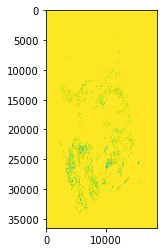

In [15]:
band = img.ReadAsArray()
plt.imshow(band)

In [16]:
from osgeo import gdal,ogr

In [30]:
shapefile = glob.glob(r'D:\Village Link\SARVision_corndata\Shan South\vector\*.shp')
for shp in shapefile:
    print(shp[53:])


Hseni.shp
Hsipaw.shp
Kalaw.shp
Kutkai.shp
Kyaukme.shp
Kyethi.shp
Laihka.shp
Langkho.shp
Lashio.shp
Lawksawk.shp
Loilen.shp
Mabein.shp
Manton.shp
Mawkmai.shp
Mongkaing.shp
Mongmit.shp
Mongnai.shp
Mongpan.shp
Mongyai.shp
Namhkan.shp
Namhsan.shp
Namtu.shp
Nansang.shp
Nawnghkio.shp
Nyaungshwe.shp
Pekon.shp
Pindaya.shp
Pinlaung.shp
shan_states.shp
Taunggyi.shp
Ywangan.shp


In [46]:
data

['D:\\Village Link\\SARVision_corndata\\Shan South\\Moonsoon Corn ( Jun - Nov )\\Clip\\SShanprojMMRGrowingStage6d_20200423_masked.tif',
 'D:\\Village Link\\SARVision_corndata\\Shan South\\Moonsoon Corn ( Jun - Nov )\\Clip\\SShanprojMMRGrowingStage6d_20200429_masked.tif',
 'D:\\Village Link\\SARVision_corndata\\Shan South\\Moonsoon Corn ( Jun - Nov )\\Clip\\SShanprojMMRGrowingStage6d_20200505_masked.tif',
 'D:\\Village Link\\SARVision_corndata\\Shan South\\Moonsoon Corn ( Jun - Nov )\\Clip\\SShanprojMMRGrowingStage6d_20200511_masked.tif',
 'D:\\Village Link\\SARVision_corndata\\Shan South\\Moonsoon Corn ( Jun - Nov )\\Clip\\SShanprojMMRGrowingStage6d_20200517_masked.tif',
 'D:\\Village Link\\SARVision_corndata\\Shan South\\Moonsoon Corn ( Jun - Nov )\\Clip\\SShanprojMMRGrowingStage6d_20200523_masked.tif',
 'D:\\Village Link\\SARVision_corndata\\Shan South\\Moonsoon Corn ( Jun - Nov )\\Clip\\SShanprojMMRGrowingStage6d_20200529_masked.tif',
 'D:\\Village Link\\SARVision_corndata\\Shan Sou

In [ ]:
for shp in shapefile:
    for i in data:
    #print("found data =",i)
        img= gdal.Open(i)
        band = img.ReadAsArray()
        options = gdal.WarpOptions(cutlineDSName=shp ,cropToCutline=True)
        
        output = gdal.Warp(srcDSOrSrcDSTab= img ,
                        destNameOrDestDS=outputPath +shp[53:]+'clip',
                        options=options)

In [48]:
outputPath ='D:\Village Link\SARVision_corndata\Shan South\clip'

In [49]:
outputPath

'D:\\Village Link\\SARVision_corndata\\Shan South\\clip'

In [1]:
import fiona

In [2]:
import rasterio
import rasterio.mask
import glob as glob

In [6]:
with fiona.open(r"D:\Village Link\SARVision_corndata\Shan South\vector\proj\Mawkmai.shp") as shapefile:
    shapes = [feature["geometry"]for feature in shapefile]

In [7]:
with rasterio.open(r"D:\Village Link\SARVision_corndata\Shan South\Moonsoon Corn ( Jun - Nov )\Clip\SShanprojMMRGrowingStage6d_20200423_masked.tif") as src:
    out_image,out_transform= rasterio.mask.mask(src,shapes,crop =True)
    out_meta=src.meta
    

    

In [11]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

In [12]:
with rasterio.open("RGB.byte.masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [16]:
import matplotlib.pyplot as plt

In [90]:
shapefile = glob.glob(r"D:\Village Link\SARVision_corndata\Shan South\vector\proj\*.shp")
data = glob.glob("D:\Village Link\SARVision_corndata\Shan South\Moonsoon Corn ( Jun - Nov )\Clip\*.tif")
for j in data:
    for i in shapefile:
        with fiona.open(i) as shp:
            shapes = [feature["geometry"]for feature in shp]
        with rasterio.open(j) as src:
            out_image,out_transform= rasterio.mask.mask(src,shapes,crop =True)
            out_meta=src.meta
            
            out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
            
        with rasterio.open("D:\Village Link\SARVision_corndata\Shan South\clip\masked"+str(i[58:-4])+"_"+str(j[106:114])+".tif", "w", **out_meta) as dest:
            dest.write(out_image)
            
          
    
    

    


In [89]:
for j in shapefile:
    #print(j[58:65])
    print(j[58:-4])

Hseni
Hsipaw
Kalaw
Kutkai
Kyaukme
Kyethi
Laihka
Langkho
Lashio
Lawksawk
Loilen
Mabein
Manton
Mawkmai
Mongkaing
Mongmit
Mongnai
Mongpan
Mongyai
Namhkan
Namhsan
Namtu
Nansang
Nawnghkio
Nyaungshwe
Pekon
Pindaya
Pinlaung
shan_states
Taunggyi
Ywangan
